## Fitting activator function parameters to match desired outputs

![](images/7-multi-level-activation.png)

Let's revisit the multi-level activation notebook, where we activate three different genes at three different concentrations.

But, this time, let's not specify any parameters for the various functions. Instead, let's lay out our _desired_ time course and tell dinkum to figure out what parameters to use. The only thing we need to do is tell it what activator functions we want.

In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn, vfg_functions
from dinkum.vfg import Decay, Growth, Repressor, Activator, GeneTimecourse

import pandas as pd
from matplotlib import pyplot as plt

initializing: dinkum v0.6.0
start=1 stop=10


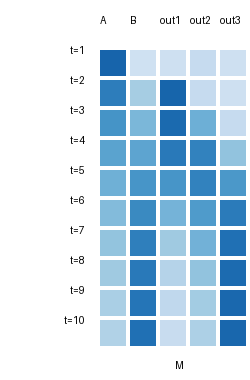

In [2]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')

out1 = Gene(name='out1')
out2 = Gene(name='out2')
out3 = Gene(name='out3')

a.custom_obj(Decay(rate=1.2, tissue=m))
b.custom_obj(Growth(rate=0.25, tissue=m))

out1.custom_obj(Activator(activator_name='A'))
out2.custom_obj(Repressor(activator_name='B', repressor_name='B'))
out3.custom_obj(Activator(activator_name='B'))

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

Text(0, 0.5, 'level')

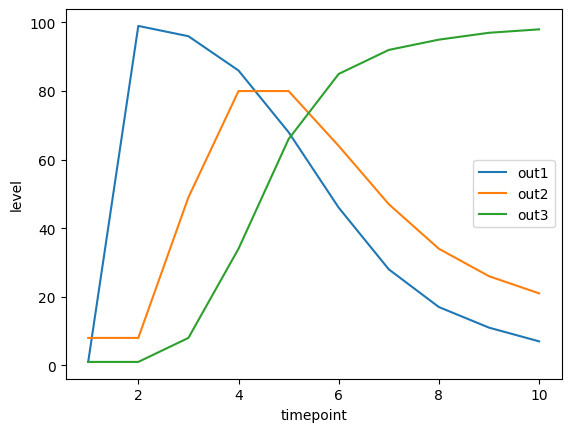

In [3]:
# now let's plot the concentrations
conc_df[['out1', 'out2', 'out3']].plot()
plt.ylabel('level')


In [4]:
# our desired pattern of expression over time:
out1_goal = GeneTimecourse(values=[1, 1, 1], start_time=2, tissue=m)
out2_goal = GeneTimecourse(values=[1, 1, 1], start_time=5, tissue=m)
out3_goal = GeneTimecourse(values=[1, 1, 1], start_time=8, tissue=m)

In [5]:
vfg.run_lmfit2(1, 10, out1=out1_goal, out2=out2_goal, out3=out3_goal, method='emcee')

found 3 genes to fit: out1, out2, out3
1 6 3
4 3 3
7 0 3
start=1 stop=10


  0%|                                                  | 0/1000 [00:00<?, ?it/s]/Users/t/miniforge3/envs/py311/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████████| 1000/1000 [00:12<00:00, 78.60it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 8 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 98.54405905  91.37038718 131.27663938 112.07082106 127.96421491
  39.97190435 137.9758184   84.3352669 ]
fit values:
	out1_rate: fit=65.3135360767748 (was: 11)
	out1_midpoint: fit=62.99767303482267 (was: 50.0)
	out2_activator_rate: fit=39.23907549978079 (was: 11.0)
	out2_activator_midpoint: fit=49.525509689418726 (was: 25.0)
	out2_repressor_rate: fit=64.06972725468495 (was: 11.0)
	out2_repressor_midpoint: fit=78.94245968192716 (was: 75.0)
	out3_rate: fit=47.53537495835715 (was: 11)
	out3_midpoint: fit=78.84878599961208 (was: 50.0)


start=1 stop=10


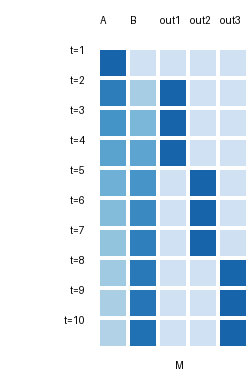

In [6]:
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

Text(0, 0.5, 'level')

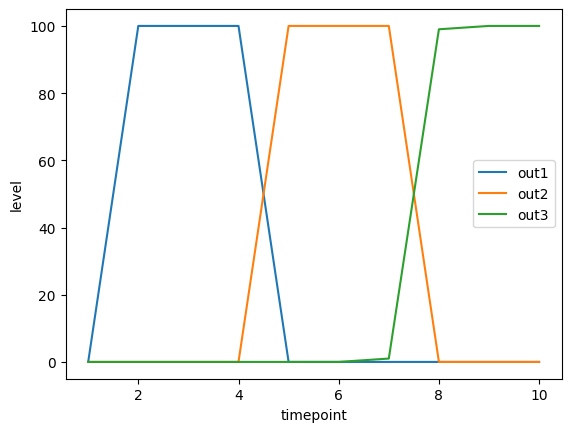

In [7]:
# now let's plot the concentrations
conc_df[['out1', 'out2', 'out3']].plot()
plt.ylabel('level')
